# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
temp = []
humidity = []
cloudiness = []
wind_speed = []
lng = []
lat = []
date = []
country = []

x = 1

for city in cities:
    weather_url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&units=Imperial&appid=" + weather_api_key
    weather_request = requests.get(weather_url).json()
    print("Processing..." + str(city) + ", number " + str(x))
    try:
        lng.append(weather_request["coord"]["lon"])
        lat.append(weather_request["coord"]["lat"])
        temp.append(weather_request["main"]["temp_max"])
        cloudiness.append(weather_request["clouds"]["all"])
        humidity.append(weather_request["main"]["humidity"])
        wind_speed.append(weather_request["wind"]["speed"])
        date.append(weather_request["dt"])
        country.append(weather_request["sys"]["country"])
    except:
        lng.append("NaN")
        lat.append("NaN")
        temp.append("NaN")
        cloudiness.append("NaN")
        humidity.append("NaN")
        wind_speed.append("NaN")
        date.append("NaN")
        country.append("NaN")
   
    x+=1

Processing...busselton, number 1
Processing...svetlyy, number 2
Processing...barentsburg, number 3
Processing...cervo, number 4
Processing...ushuaia, number 5
Processing...rikitea, number 6
Processing...cidreira, number 7
Processing...nizhneyansk, number 8
Processing...atuona, number 9
Processing...hamilton, number 10
Processing...san patricio, number 11
Processing...bria, number 12
Processing...mar del plata, number 13
Processing...clyde river, number 14
Processing...geraldton, number 15
Processing...airai, number 16
Processing...necochea, number 17
Processing...isangel, number 18
Processing...the pas, number 19
Processing...albany, number 20
Processing...cabras, number 21
Processing...nanortalik, number 22
Processing...longyearbyen, number 23
Processing...tasiilaq, number 24
Processing...margate, number 25
Processing...cape town, number 26
Processing...buala, number 27
Processing...xam nua, number 28
Processing...punta arenas, number 29
Processing...maumere, number 30
Processing...la

Processing...najran, number 241
Processing...eureka, number 242
Processing...bakuriani, number 243
Processing...korla, number 244
Processing...saint-marc-des-carrieres, number 245
Processing...cavalcante, number 246
Processing...moose factory, number 247
Processing...esperance, number 248
Processing...nadvoitsy, number 249
Processing...tuktoyaktuk, number 250
Processing...forssa, number 251
Processing...yirol, number 252
Processing...vrangel, number 253
Processing...faanui, number 254
Processing...dunedin, number 255
Processing...roald, number 256
Processing...san andres, number 257
Processing...dikson, number 258
Processing...naze, number 259
Processing...broome, number 260
Processing...khani, number 261
Processing...san quintin, number 262
Processing...tivaouane, number 263
Processing...dongsheng, number 264
Processing...sovetskiy, number 265
Processing...kampene, number 266
Processing...puerto ayacucho, number 267
Processing...nikel, number 268
Processing...fabiansebestyen, number 2

Processing...kilindoni, number 480
Processing...abbeville, number 481
Processing...baykit, number 482
Processing...harindanga, number 483
Processing...cunha, number 484
Processing...hambantota, number 485
Processing...bemidji, number 486
Processing...papara, number 487
Processing...kapit, number 488
Processing...batticaloa, number 489
Processing...darnah, number 490
Processing...dudinka, number 491
Processing...nancha, number 492
Processing...bogande, number 493
Processing...marcona, number 494
Processing...coahuayana, number 495
Processing...ippy, number 496
Processing...trairi, number 497
Processing...seydisehir, number 498
Processing...moree, number 499
Processing...fare, number 500
Processing...la dorada, number 501
Processing...miri, number 502
Processing...morro bay, number 503
Processing...richards bay, number 504
Processing...sobolevo, number 505
Processing...tautira, number 506
Processing...atar, number 507
Processing...lastoursville, number 508
Processing...boundiali, number 

In [4]:
len(lat)

614

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# convert to data frame
weather_df = pd.DataFrame({
    "City": cities,
    "Country": country,
    "Date": date,
    "Latitude": lat,
    "Longtitude": lng,
    "Max Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
})

weather_df_clean = weather_df.loc[(weather_df["Latitude"] != "NaN") &
                                        (weather_df["Longtitude"] != "NaN") &
                                        (weather_df["Max Temperature"] != "NaN") &
                                        (weather_df["Humidity"] != "NaN") &
                                       (weather_df["Cloudiness"] != "NaN") &
                                        (weather_df["Wind Speed"] != "NaN") &
                                        (weather_df["Date"] != "NaN")&
                                        (weather_df["Country"] != "NaN") &
                                        (weather_df["City"] != "NaN")
                                       ]

# export to csv
# City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed

output_path = "/Users/emilyye/BOOTCAMP WORK/upenn-phi-virt-data-09-2021-u-c/06-Python-APIs/Homework/Instructions/"

weather_df_clean.to_csv(output_path + "weather_df_clean.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# check to see if cities have humidity that is over 100%

weather_df_clean.loc[weather_df_clean["Humidity"] > 100, :]

,City,Country,Date,Latitude,Longtitude,Max Temperature,Humidity,Cloudiness,Wind Speed


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

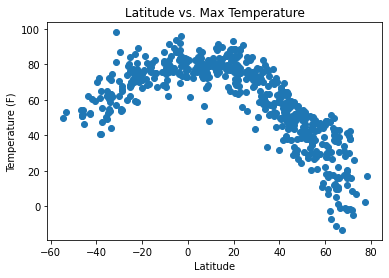

In [9]:
plt.scatter(weather_df_clean["Latitude"],weather_df_clean["Max Temperature"])

plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig(output_path + "lat_temp.png")

- This code analyzes how temperature changes with latitude. As distance from the equator (0 degrees in latitude) increases, temperature tends to drop. (The drop is most pronounced when moving north in this sample)

## Latitude vs. Humidity Plot

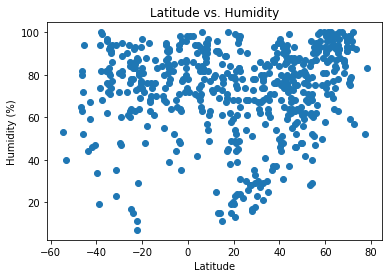

In [10]:
plt.scatter(weather_df_clean["Latitude"],weather_df_clean["Humidity"])

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig(output_path + "lat_hum.png")

- this plot analyzes the relationship between latitude and humidity. There does not appear to be a particularly significant directional trend between the two -- except perhaps that most cities in this random sample seem to have relatively higher (>60%) levels of humidity. 

## Latitude vs. Cloudiness Plot

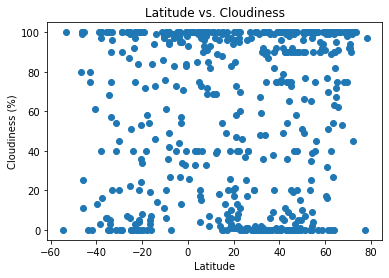

In [11]:
plt.scatter(weather_df_clean["Latitude"],weather_df_clean["Cloudiness"])

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig(output_path + "lat_cloud.png")

- this plot analyzes the relationship between cloudiness and latitude. In this plot, there appear to be higher concentrations of cities at 0% and 100% humidity (compared to other levels of humidity e.g. 40%). Latitude does not appear to have much bearing on cloudiness.

## Latitude vs. Wind Speed Plot

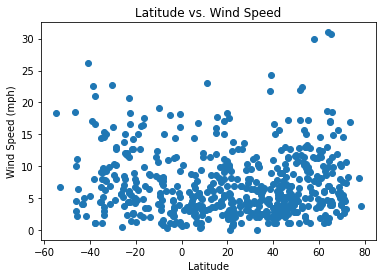

In [12]:
plt.scatter(weather_df_clean["Latitude"],weather_df_clean["Wind Speed"])

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig(output_path + "lat_wind.png")

- This plot analyzes the relationship between wind speed and latitude. Most cities in this plot have wind speeds below 15 mph.

## Linear Regression

In [13]:
nh = weather_df_clean[weather_df_clean["Latitude"] >= 0]
sh = weather_df_clean[weather_df_clean["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

-0.8637718447346319


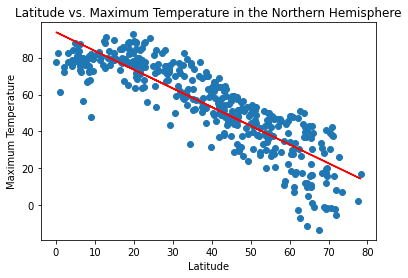

In [14]:
nh_temp = nh["Max Temperature"].astype("float")
nh_lat = nh["Latitude"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_temp)
nh_temp_lat_regress = nh_lat*slope+intercept

print(rvalue)

plt.scatter(nh_lat, nh_temp)
plt.plot(nh_lat, nh_temp_lat_regress, "r-")

plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude vs. Maximum Temperature in the Northern Hemisphere")

plt.savefig(output_path + "nh_temp_lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0.7334919335842328


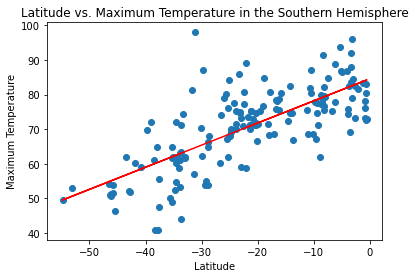

In [15]:
sh_temp = sh["Max Temperature"].astype("float")
sh_lat = sh["Latitude"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_temp)
sh_temp_lat_regress = sh_lat*slope+intercept

print(rvalue)

plt.scatter(sh_lat, sh_temp)
plt.plot(sh_lat, sh_temp_lat_regress, "r-")

plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude vs. Maximum Temperature in the Southern Hemisphere")

plt.savefig(output_path + "sh_temp_lat.png")

# Analysis of Max Temp vs. Latitude across Hemispheres
- The linear regression in both plots above illustrates the relationship between maximum temperature and latitude. 
- As distance from the equater increases (absolute value of latitude increases), maximum temperature tends to drop
- in this sample, the correlation between the two variables appears to be stronger for cities in the northern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.2496967479978703


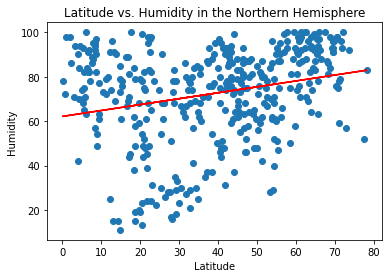

In [16]:
nh_hum = nh["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_hum)
nh_hum_lat_regress = nh_lat*slope+intercept

print(rvalue)

plt.scatter(nh_lat, nh_hum)
plt.plot(nh_lat, nh_hum_lat_regress, "r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity in the Northern Hemisphere")

plt.savefig(output_path + "nh_hum_lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.1347406668809368


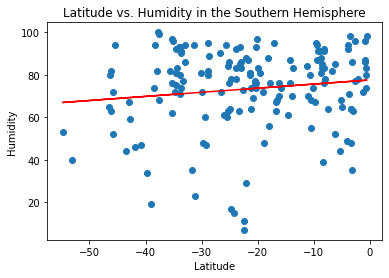

In [17]:
sh_hum = sh["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_hum)
sh_hum_lat_regress = sh_lat*slope+intercept

print(rvalue)

plt.scatter(sh_lat, sh_hum)
plt.plot(sh_lat, sh_hum_lat_regress, "r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity in the Southern Hemisphere")

plt.savefig(output_path + "sh_hum_lat.png")

# Analysis of Humidity vs. Latitude across Hemispheres
- the above two plots illustrate the relationship between humidity (%) and latitude.
- there appears to be a relatively weaker relationship between latitude and humidity here (wide spread of data points around the linear regression best fit line)
- As distance from the equater decreases (closer to 0 degrees in latitude), humidity increases slightly in the Southern Hemisphere
- As distance from the equater decreases (closer to 0 degrees in latitude), humidity decreases slightly in the Northern Hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.1613469890383798


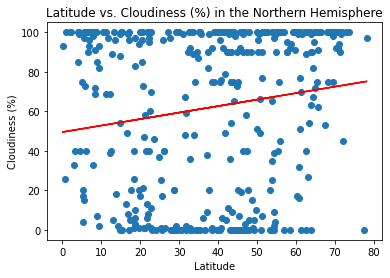

In [18]:
nh_cloud = nh["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_cloud)
nh_cloud_lat_regress = nh_lat*slope+intercept

print(rvalue)

plt.scatter(nh_lat, nh_cloud)
plt.plot(nh_lat, nh_cloud_lat_regress, "r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness (%) in the Northern Hemisphere")

plt.savefig(output_path + "nh_cloud_lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.16424939100257763


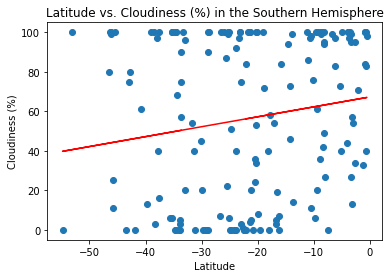

In [19]:
sh_cloud = sh["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_cloud)
sh_cloud_lat_regress = sh_lat*slope+intercept

print(rvalue)

plt.scatter(sh_lat, sh_cloud)
plt.plot(sh_lat, sh_cloud_lat_regress, "r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness (%) in the Southern Hemisphere")

plt.savefig(output_path + "sh_cloud_lat.png")

# Analysis of Cloudiness vs. Latitude across the hemispheres
- These two plots model the relationship between % cloudiness and latitude across the hemispheres. 
- There does not appear to a very strong correlation between % cloudiness and latitude in either the northern or southern hemisphere (As latitude increases, % cloudiness varies widely)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.17688431379806513


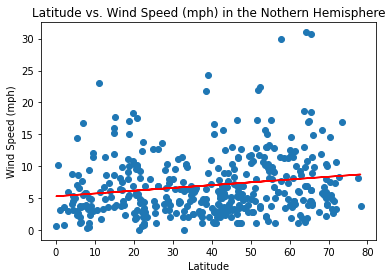

In [23]:
nh_wind = nh["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_wind)
nh_wind_lat_regress = nh_lat*slope+intercept

print(rvalue)

plt.scatter(nh_lat, nh_wind)
plt.plot(nh_lat, nh_wind_lat_regress, "r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed (mph) in the Nothern Hemisphere")

plt.savefig(output_path + "nh_ws_lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

-0.18405830501131357


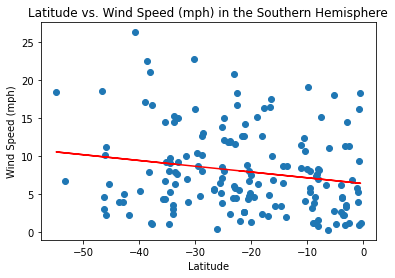

In [22]:
sh_wind = sh["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_wind)
sh_wind_lat_regress = sh_lat*slope+intercept

print(rvalue)

plt.scatter(sh_lat, sh_wind)
plt.plot(sh_lat, sh_wind_lat_regress, "r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed (mph) in the Southern Hemisphere")

plt.savefig(output_path + "sh_ws_lat.png")

# Analysis of Wind Speed vs. Latitude across hemispheres
- these pair of plots show the relationship between wind speed and latitude. 
- the first of the pair indicates that, in the northern hemisphere, as distance from the equator increases, wind speed tends to pick up slightly
- the second of the pair indicates that as distance from the equator increases, wind speed tends to pick up as well
- That said, the relationship between the two factors in both plots appears fairly weak.

# 3 Observable Trends
- There appears to be a strong trend between maximum temperature and latitude. As distance from the equator increases, maximum temperature tends to drop. This seems reasonable since the areas near the equator - relative to areas in the poles - are closer to the sun.
- On the other hand, the relationship between latitude and other weather variables - cloudiness, wind speed, etc. - is much weaker. This may be because other factors not measured by latitude or proximity/orientation to the sun affect cloud formation, winds, etc. It could be interesting to test those other factors.
- Most cities in this sample appear to have wind speeds below 15mph. That seems to be a reasonable constant given that very high values would make for less hospitable areas to live/form cities. (Given that this data was pulled from OpenWeather's current weather API, it is specific to this time and season; it may be interesting to see if/how wind speed values have changed historically, or how they may change going forward.)